# Data Science Challenge

In [44]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

import sys
!{sys.executable} -m pip install --upgrade --quiet seaborn

In [1]:
#Libraries
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [33]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")
label = data['yearly_availability']
test_data = pd.read_csv("test.csv")
data.drop(columns=['yearly_availability'], inplace=True)

In [34]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3


In [35]:
#Explore columns
data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels'],
      dtype='object')

In [36]:
#Description
data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000


In [37]:
data['region'].value_counts()

Manhattan        1333
Brooklyn         1075
Queens            370
Bronx              78
Staten Island      14
Name: region, dtype: int64

In [38]:
data['accommodation_type'].value_counts()

Private room       1225
Entire home/apt    1002
Shared room         643
Name: accommodation_type, dtype: int64

### Handling Categorical Values

- As we can see, we have two categorical columns. Before we input this data to any model, we need to handle these categorical features. There are lots of methods to do this task. I will use One Hot encoding for this since these are nomial classes i.e there is no order or relationship between these classes.

In [39]:
data = pd.get_dummies(data)
test_data = pd.get_dummies(test_data)

In [40]:
data.head()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,13232,40.71854,-74.00439,170,5,7,0.56,929983,1,0,0,1,0,0,1,0,0
1,246,40.64446,-73.95030,65,3,238,2.30,281764,1,0,1,0,0,0,1,0,0
2,19091,40.78573,-73.81062,85,1,0,NaN,19923341,1,0,0,0,1,0,0,1,0
3,34305,40.73863,-73.98002,210,30,0,NaN,200380610,65,0,0,1,0,0,0,1,0
4,444,40.82426,-73.94630,75,3,38,0.42,745069,3,0,0,1,0,0,0,0,1


- Now we can see that our data is starting to look a bit clean. But in this sample, we can see some NaN values. Let's handle those now.

In [41]:
data.isna().sum()

id                                      0
latitude                                0
longitude                               0
cost                                    0
minimum_nights                          0
number_of_reviews                       0
reviews_per_month                     676
owner_id                                0
owned_hotels                            0
region_Bronx                            0
region_Brooklyn                         0
region_Manhattan                        0
region_Queens                           0
region_Staten Island                    0
accommodation_type_Entire home/apt      0
accommodation_type_Private room         0
accommodation_type_Shared room          0
dtype: int64

In [42]:
test_data.isna().sum()

id                                      0
latitude                                0
longitude                               0
cost                                    0
minimum_nights                          0
number_of_reviews                       0
reviews_per_month                     173
owner_id                                0
owned_hotels                            0
region_Bronx                            0
region_Brooklyn                         0
region_Manhattan                        0
region_Queens                           0
region_Staten Island                    0
accommodation_type_Entire home/apt      0
accommodation_type_Private room         0
accommodation_type_Shared room          0
dtype: int64

### Handling Null Values

- Again, there are lots of methods which can achieve this task. Some are listed below:
    - Removing the missing values: This works best when the missing value counts are so low that it won't affect the model training.
    - Replacing the missing values by zero: This option is viable when handling numerical features of less importance.
    - Replacing the missing values by Mean, Median etc.: This choice is the next best one since it is consistent with the Normal curve.
    - Missing value imputation: This employs algorithms which can estimate the missing values based on the relationships between other features. 
- From the above choices, I am going ahead with the last one: Missing Value Imputation. There are numerous methods to achieve this. I am using IterativeImputer.

In [43]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute = IterativeImputer()
data[:] = impute.fit_transform(data)
test_data[:] = impute.fit_transform(test_data)

In [44]:
data.isna().sum()

id                                    0
latitude                              0
longitude                             0
cost                                  0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                     0
owner_id                              0
owned_hotels                          0
region_Bronx                          0
region_Brooklyn                       0
region_Manhattan                      0
region_Queens                         0
region_Staten Island                  0
accommodation_type_Entire home/apt    0
accommodation_type_Private room       0
accommodation_type_Shared room        0
dtype: int64

## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

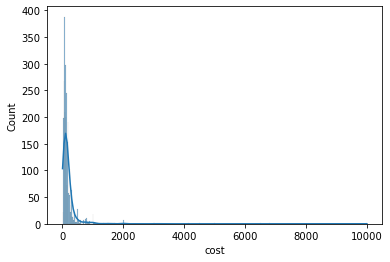

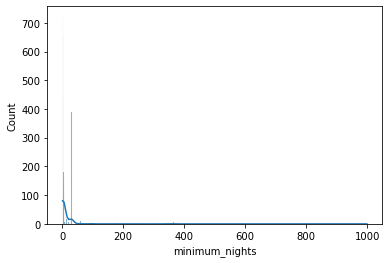

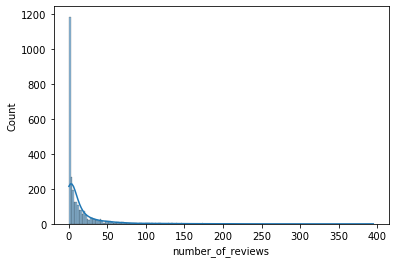

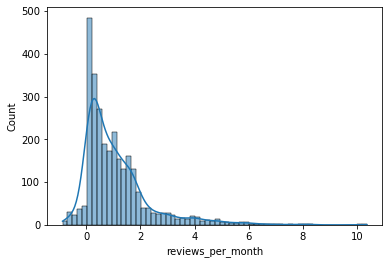

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
num_features = ['cost','minimum_nights','number_of_reviews','reviews_per_month']
for i in num_features:
    fig = sns.histplot(data[i], kde=True)
    plt.show()

- Based on the histograms, we can see that the data is highly skewed. Therefore, we will need to apply some transformation to the data.

### Data Transformation

- To transform the data, I have gone with the box-cox method which I will implement as follows:

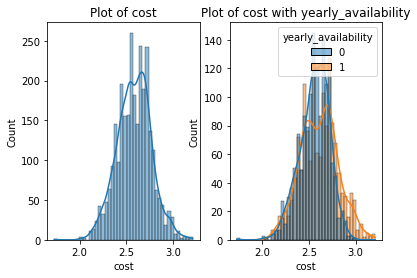

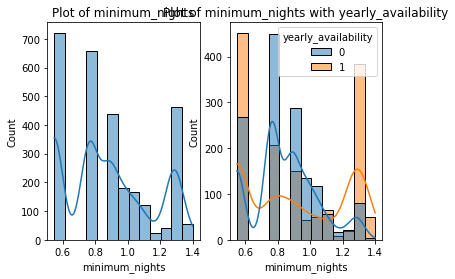

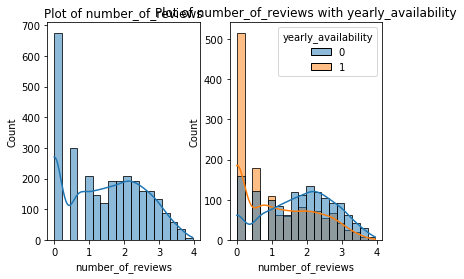

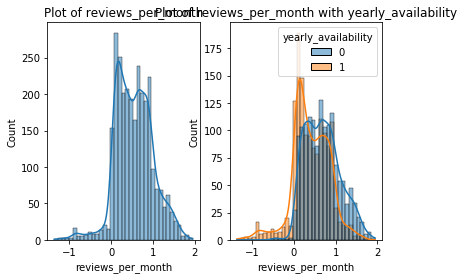

In [46]:
from sklearn import preprocessing
bc_t = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False)
tem = data.copy()   ## Let's first test on a copy of the data to see if the transformation gives us any good results
for i in num_features:
    #tem[i] = scalar.fit(data[i].values.reshape(-1,1)+1)
    tem[i] = bc_t.fit_transform(data[i].to_numpy().reshape(-1,1)).reshape(-1,1)
    fig,ax = plt.subplots(1,2)
    sns.histplot(data=tem, x=i, kde=True, ax=ax[0]).set_title(f'Plot of {i}')
    sns.histplot(data=tem, x=i, kde=True, hue=label, ax=ax[1]).set_title(f'Plot of {i} with yearly_availability')
    plt.show()

- The above data looks much better now. Let's make some more visualizations to get more insights.

In [47]:
tem.drop(columns=['id', 'owner_id', 'latitude', 'longitude'], inplace = True)
X = tem.to_numpy()
y = label.to_numpy()

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

- For my baseline model, I will first train a KNN model, with neighbors ranging from 1 to 40 and plot the elbow curve to get the best value of k. Then I will train a Random Forest classifier without hyperparameter tuning and finally a hyperparameter tuned Random Forest model. In the end, I will use Cross Validation to evaluate the models.

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Text(0, 0.5, 'Error Rate')

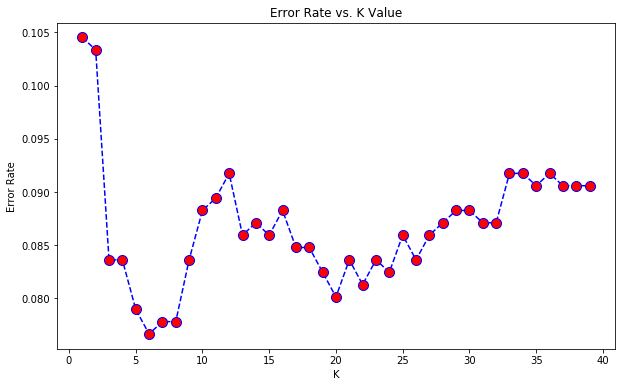

In [55]:
error_rate = []
test_accuracy_score = []
for k in range(1,):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_i = knn.predict(x_test)
    error_rate.append(np.mean(y_pred_i != y_test))
    test_accuracy_score.append(accuracy_score(y_test,y_pred_i))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [56]:
test_accuracy_score.index(max(test_accuracy_score))

5

In [57]:
max(test_accuracy_score)

0.9233449477351916

- Therefore, at K=6, we get the elbow i.e the error rate is the minimum and the accuracy is the maximum

In [61]:
rf = RandomForestClassifier(criterion = 'gini')

In [73]:
from sklearn.model_selection import cross_val_score
rfccv = cross_val_score(rf, X, y, cv=3)
print(f'Random Forest: Cross validation score is {rfccv} and mean of CV is {rfccv.mean()}')

Random Forest: Cross validation score is [0.90491118 0.92789969 0.92154812] and mean of CV is 0.9181196614828124


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


- Here, without any hyperparameter tuning with cross validation, the maximum accuracy that we are getting is 91.95% for Random Forest. Let's now tune some hyperparameters for Random Forest.

In [65]:
from sklearn.model_selection import RandomizedSearchCV
param_rfc = {'n_estimators': [3, 8, 15, 20], 'max_depth': [5, 10, 15], 'min_samples_leaf': [20, 50]}

In [78]:
# Random Forest hyper parameters
clf_rf = RandomizedSearchCV(rf, param_rfc, random_state=1)
find_rf = clf_rf.fit(X, y)
find_rf.best_params_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_estimators': 15, 'min_samples_leaf': 20, 'max_depth': 5}

- Using these hyperparamters into the Random Forest Model with K fold cross validation.

In [75]:
from sklearn.model_selection import RepeatedKFold
def model_eval(model, X, y, repeat, split = 5) -> list:
    cv = RepeatedKFold(n_splits = split, n_repeats = repeat, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [79]:
iter = range(1,11)
res = []
for i in iter:
    sc = modelEvaluate(find_rf.best_estimator_ , X, y, i)
    res.append(sc)
for i in range(len(res)):
    print(np.mean(res[i]), np.std(res[i]))

0.9212543554006969 0.012387727410892802
0.9226480836236932 0.011187870632754218
0.9219512195121952 0.008727046408440974
0.9234320557491289 0.00861400927411992
0.9232752613240417 0.010019830039214151
0.9222996515679444 0.010024110275179196
0.92344449975112 0.00875491920992361
0.9229965156794424 0.009756097560975613
0.9228803716608596 0.010214072411577532
0.9231010452961672 0.009849047016354034


- Finally we will train a KNN with k=6 with cross validation and we will report the results.

In [77]:
knn_best = KNeighborsClassifier(n_neighbors=6)
res_knn = []
for i in iter:
    sc = modelEvaluate(knn_best, X, y, i)
    res_knn.append(sc)
for i in range(len(res_knn)):
    print(np.mean(res_knn[i]), np.std(res_knn[i]))

0.9167247386759583 0.007899501079271508
0.9209059233449477 0.010602873905716346
0.92137049941928 0.010155796626573378
0.9209930313588851 0.0098593805001057
0.9205574912891986 0.010359629789072138
0.9205574912891986 0.010044275474146052
0.9202090592334495 0.009764982088416434
0.9204268292682926 0.009279252479677577
0.9203252032520324 0.009615434162982217
0.9204878048780489 0.009572437537907855


- Therefore, the best accuracy among the trained models is of Hyperparameter tuned Random Forest at approx. *92.34%* with std deviation of approx. *0.008* .



**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


In [83]:
imp = pd.Series(find_rf.best_estimator_.feature_importances_, index=tem.columns)
top = imp.sort_values(ascending = False)

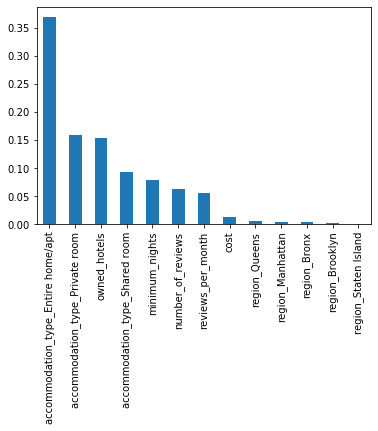

In [84]:
top.plot.bar()
plt.show()

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

In [85]:
ids = test_data['id']
test_data.drop(columns=['id', 'owner_id', 'latitude', 'longitude'], inplace = True)

In [86]:
y_pred = find_rf.best_estimator_.predict(test_data.to_numpy())
d = {'id': ids.astype(int), 'yearly_availability': y_pred}
submission_df = pd.DataFrame(data = d)
submission_df.head()

,id,yearly_availability
0,19215,1
1,36301,0
2,40566,1
3,33694,1
4,28873,0


In [87]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---